In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

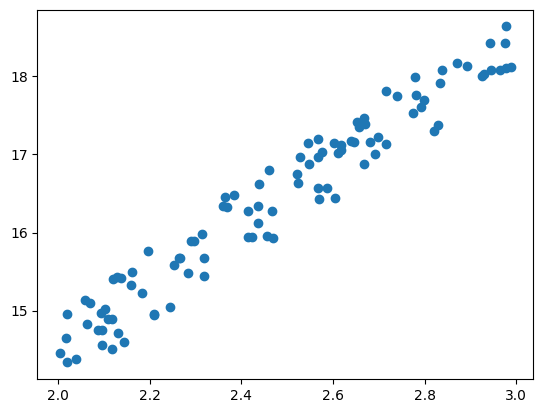

In [2]:
np.random.seed(0)
x  =  2 + np.random.rand(100,1)
y = 6+4*x + np.random.rand(100,1)
plt.scatter(x,y)

In [3]:
print(x[0])
print(y[0])

[2.5488135]
[16.87307055]


In [4]:
def get_weight_updates(w1,w0,x,y,learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(x,w1.T) + w0
    diff = y-y_pred
    
    w0_factors = np.ones((N,1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(x.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update, w0_update    

In [5]:
def gradient_descent_steps(x,y,iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,x,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1,w0

In [6]:
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [6]:
w1, w0 = gradient_descent_steps(x,y,iters=10000)
print("w1:{:.3f}, w0:{:3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * x + w0
print('Gradient Descent Total Cost:{:.4f}'.format(get_cost(y,y_pred)))

w1:4.111, w0:6.249041
Gradient Descent Total Cost:0.0788


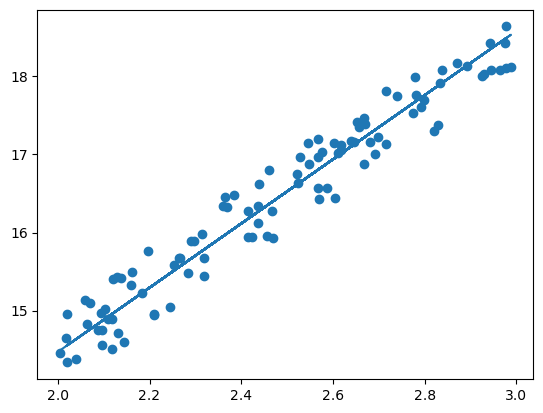

In [7]:
plt.scatter(x,y)
plt.plot(x,y_pred)

In [8]:
def stochastic_gradient_descent_steps(x,y,batch_size=10,iters=1000):
    w0=np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        stochastic_random_index = np.random.permutation(x.shape[0])
        sample_x = x[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1,w0,sample_x,
                                                  sample_y,learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
        
    return w1,w0

In [9]:
w1,w0 = stochastic_gradient_descent_steps(x,y,iters=10000)
print("w1:{:.3f}, w0:{:3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * x + w0
print('Stochastic Gradient Descent Total Cost:{:.4f}'.format(get_cost(y,y_pred)))

w1:4.104, w0:6.264428
Stochastic Gradient Descent Total Cost:0.0786
